In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import glob
import os
import cv2

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [8]:
audio_files = glob.glob(r"/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/*")
# root_folder = r'/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files'
# file_paths = 

In [9]:
audio_files

['/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/01 Shi.mp3',
 '/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/05 Spaexbwyond.mp3',
 '/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/06 Madspyk.mp3',
 '/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/04 Spawx.mp3',
 '/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/02 Bazrxk.mp3',
 '/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/07 Kwyest.mp3',
 '/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files/03 Cultzdeth.mp3']

In [17]:
for file in audio_files:
    file_name = file.split('/')[-1].split('.')[0]
    print(file_name)

01 Shi
05 Spaexbwyond
06 Madspyk
04 Spawx
02 Bazrxk
07 Kwyest
03 Cultzdeth


In [40]:
def create_spectrogram(root_dir, out_dir):

    audio_files = glob.glob(root_dir + '/*')

    if not os.path.exists(out_dir):
            os.mkdir(out_dir)    
    
    for file in audio_files:
        file_name = file.split('/')[-1].split('.')[0]
        y, sr = librosa.load(file)

        S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128,)
        S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
        fig, ax = plt.subplots(figsize=(10, 5))
        # Plot the mel spectogram
        img = librosa.display.specshow(S_db_mel,
                                    x_axis='time',
                                    y_axis='log',
                                    ax=ax)
        # ax.set_title('Mel Spectogram Example', fontsize=20)
        # fig.colorbar(img, ax=ax, format=f'%0.2f')
        ax.tick_params(axis="both", length=0, labelbottom=False, labelleft=False)
        
        plt.xlabel('')
        plt.ylabel('')
        fig.savefig(out_dir + '/' + file_name + '.png',   bbox_inches='tight', pad_inches=0 )

        

In [25]:
def spectrogram_preprocess(root_dir, out_dir, resize_px=224):
        if not os.path.exists(out_dir):
                os.mkdir(out_dir)  

        files = glob.glob(root_dir + '/*')
        for file in files:
            file_name = file.split('/')[-1].split('.')[0]
            img = cv2.imread(file)
            img = cv2.resize(img, (resize_px,resize_px), interpolation=cv2.INTER_AREA)
            cv2.imwrite(out_dir + '/' + file_name + '.png', img)




/var/folders/r6/9zxzvdfj4bd1nq9d_vmy3mgw0000gn/T/ipykernel_136/3853192515.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 5))


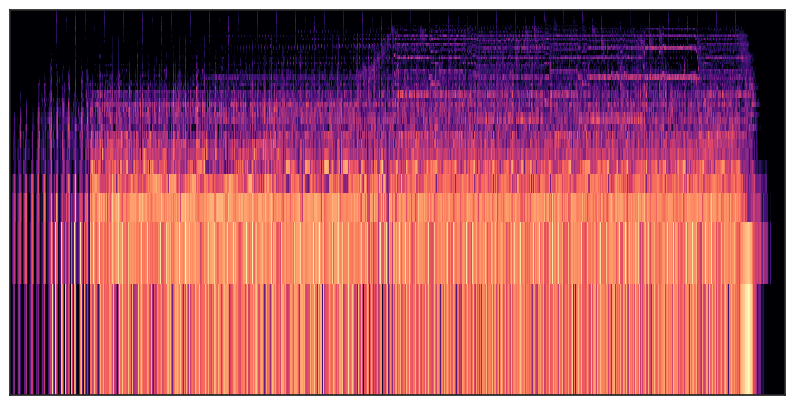

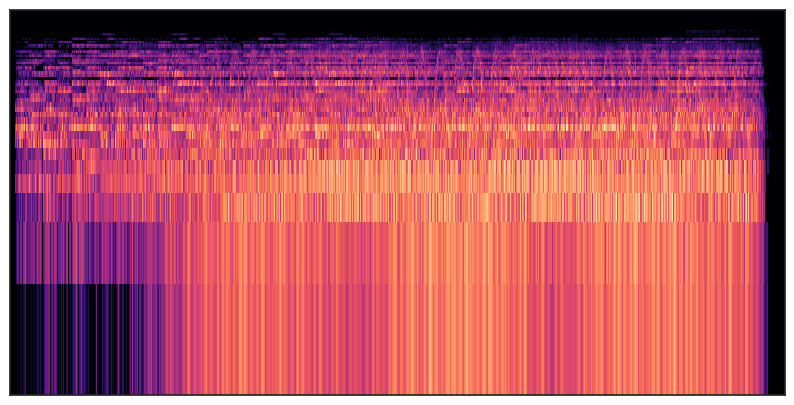

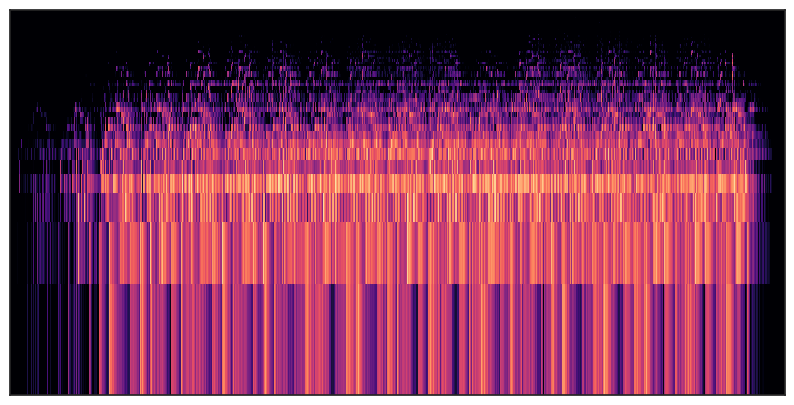

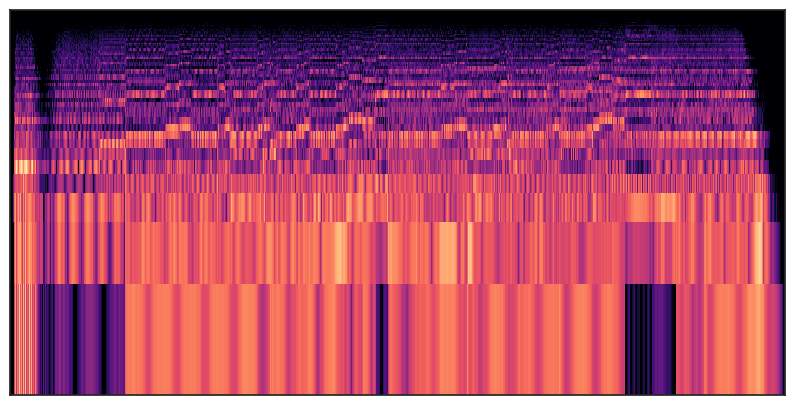

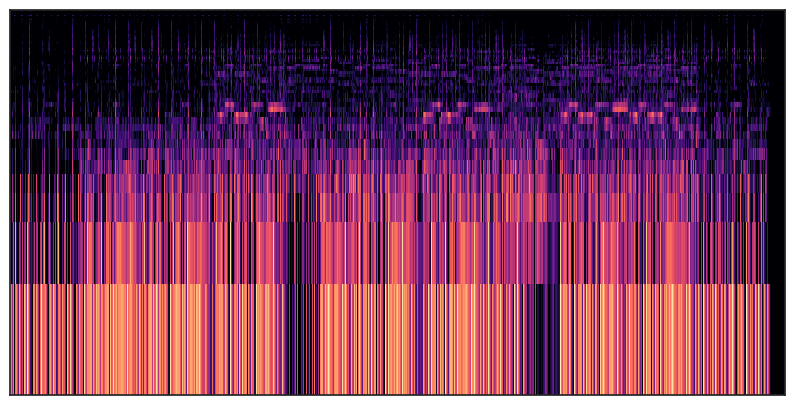

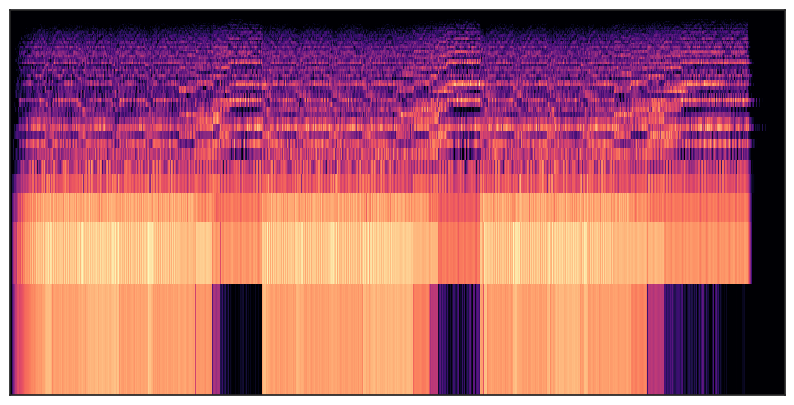

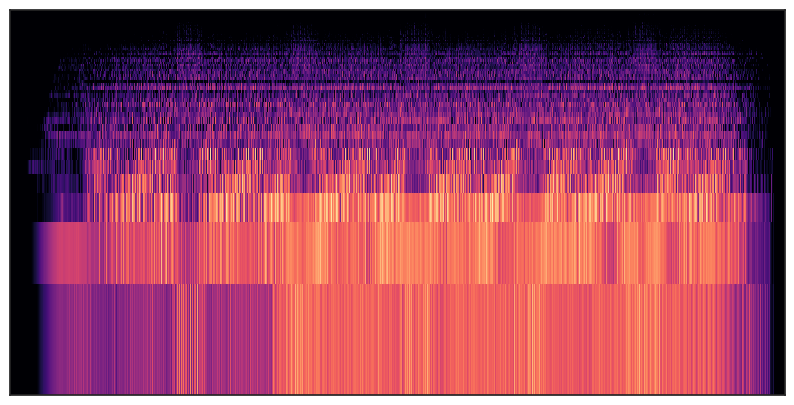

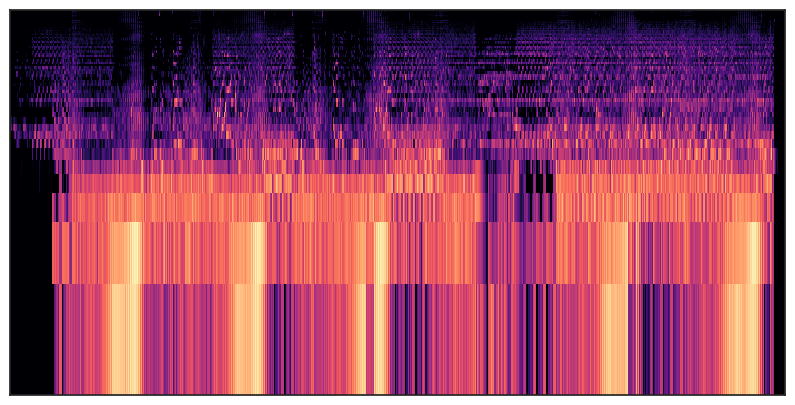

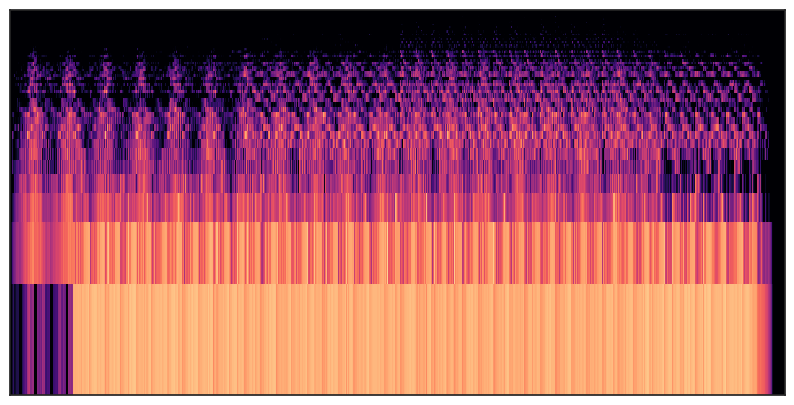

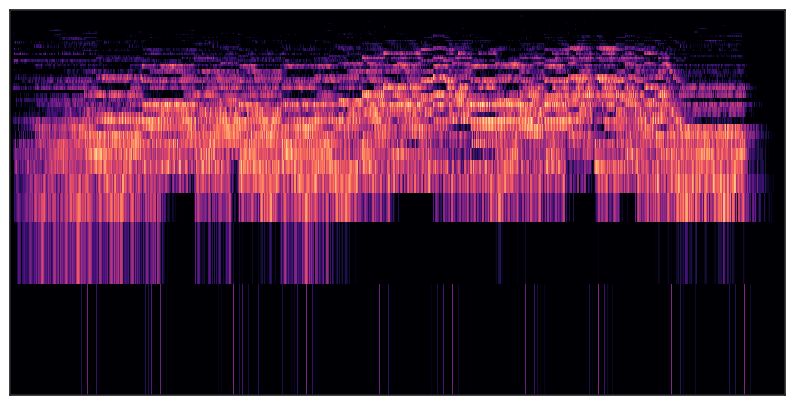

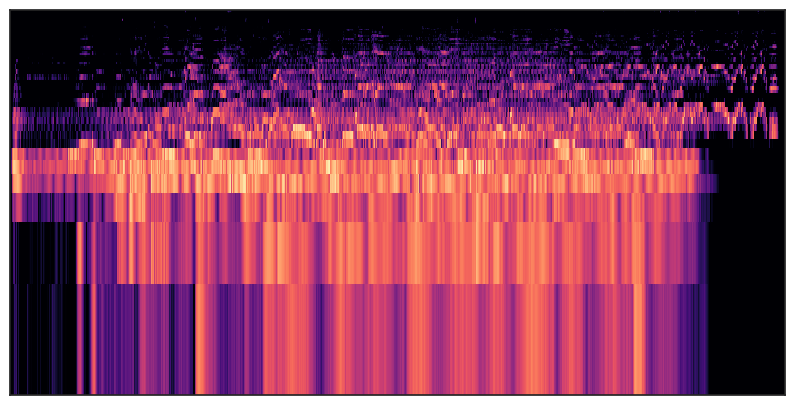

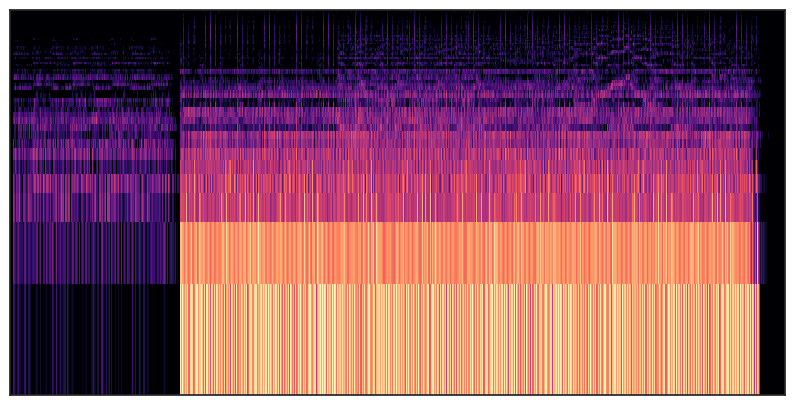

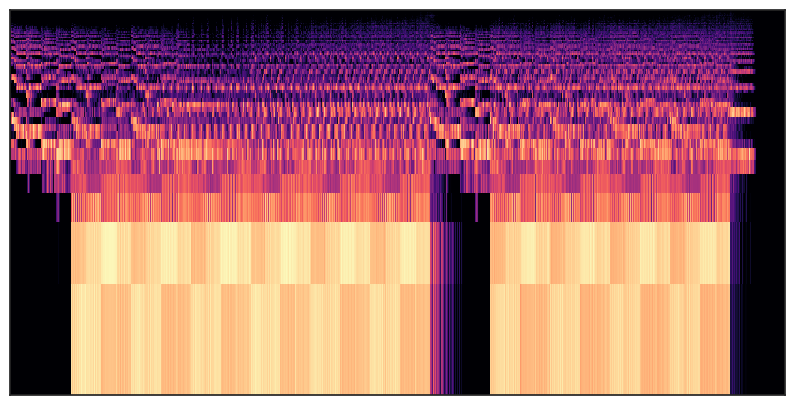

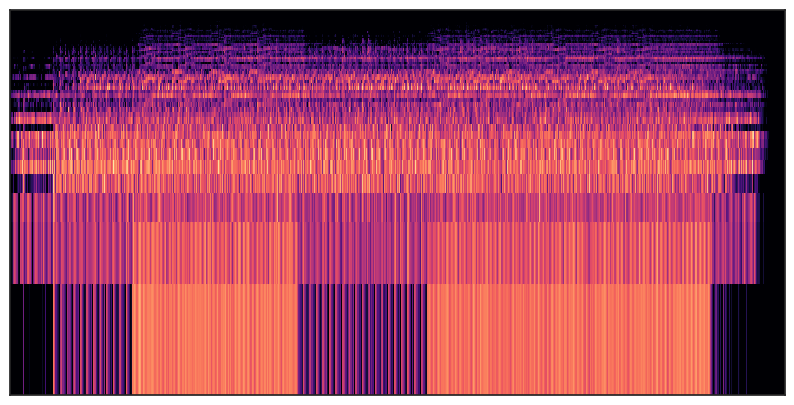

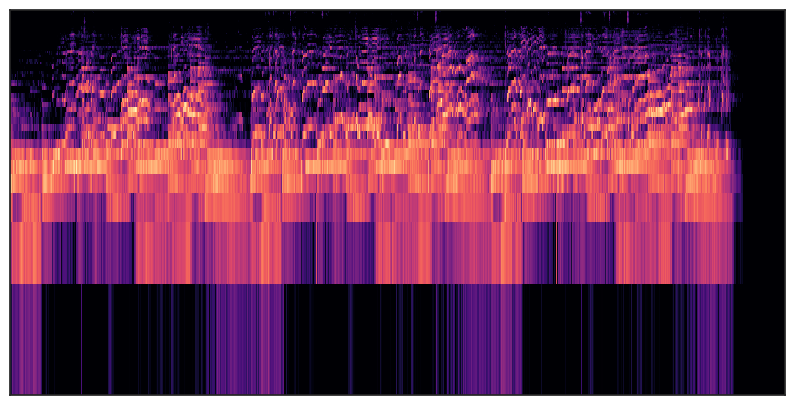

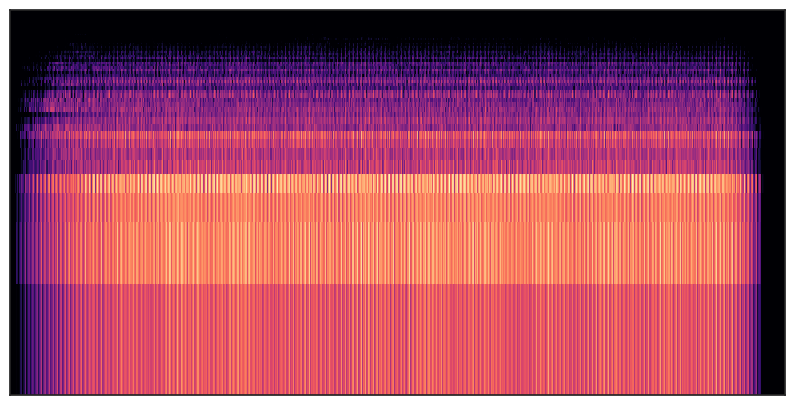

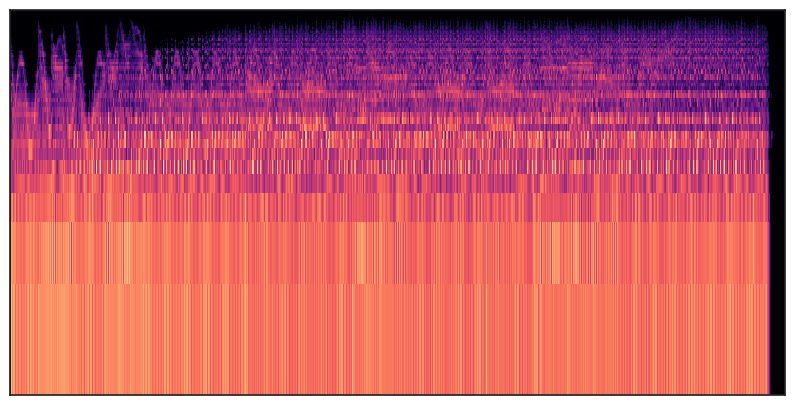

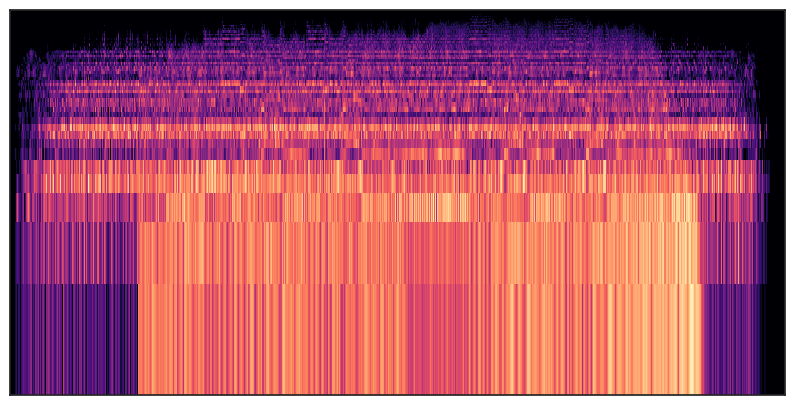

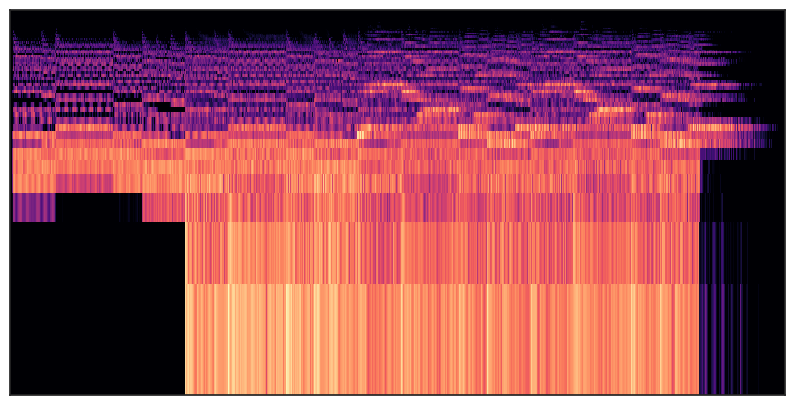

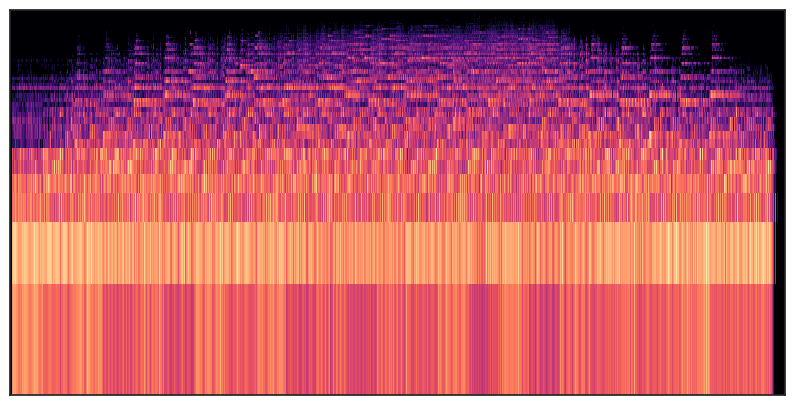

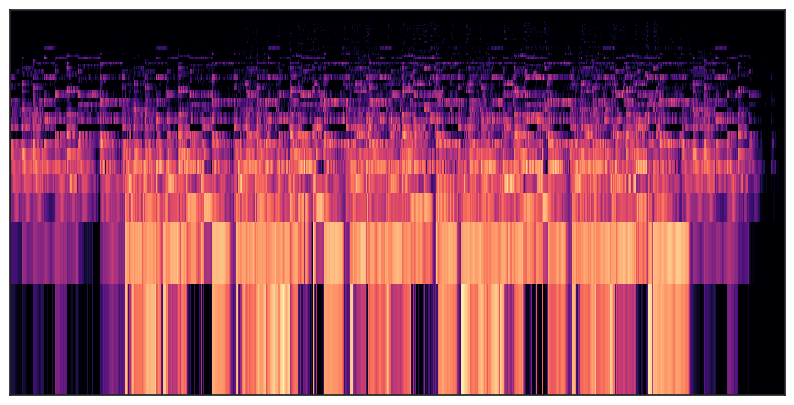

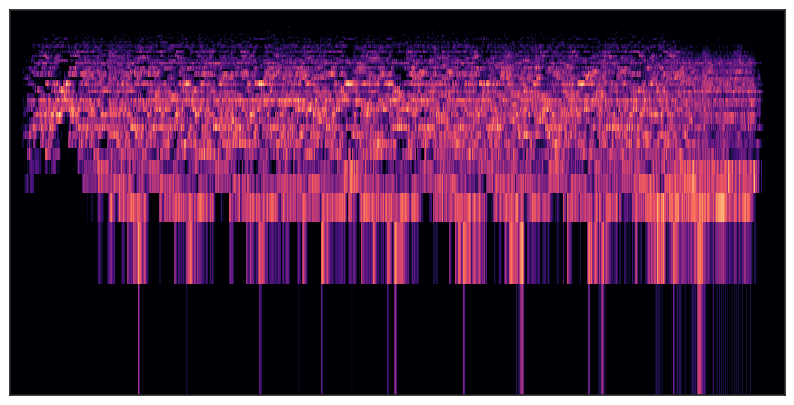

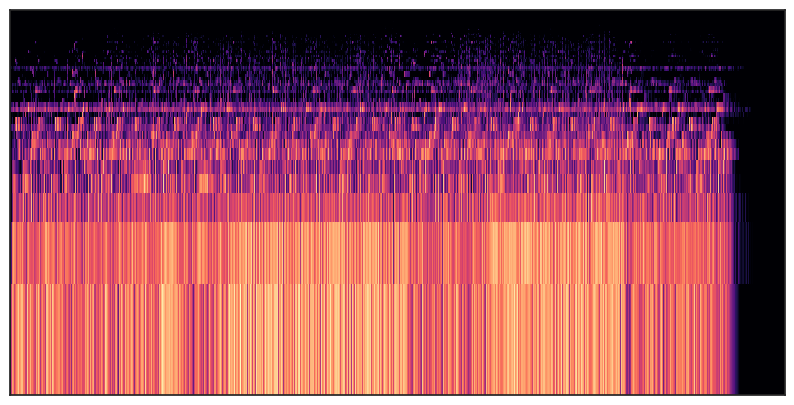

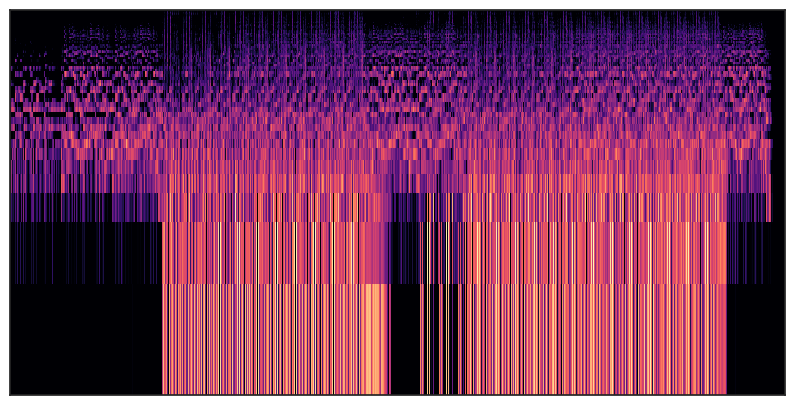

In [38]:
root_dir = r"/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/test_audio_files"
out_dir = r'/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/spectrogram_results'

create_spectrogram(root_dir=root_dir, out_dir=out_dir)


In [39]:
out_dir = r"/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/pre_processed"
root_dir = r'/Users/pietrocaprioglio/Documents/GitHub/AI-audio-visual-generative/spectrogram_results'

spectrogram_preprocess(root_dir=root_dir, out_dir=out_dir)

In [10]:
y, sr = librosa.load(audio_files[0])

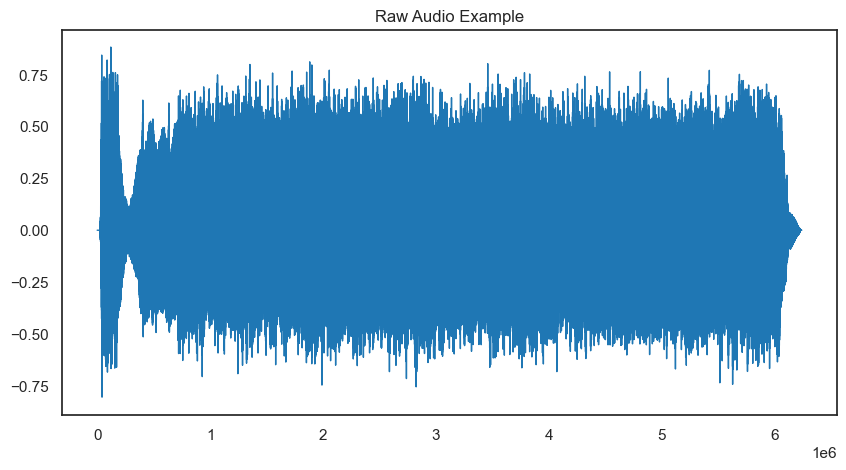

In [11]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

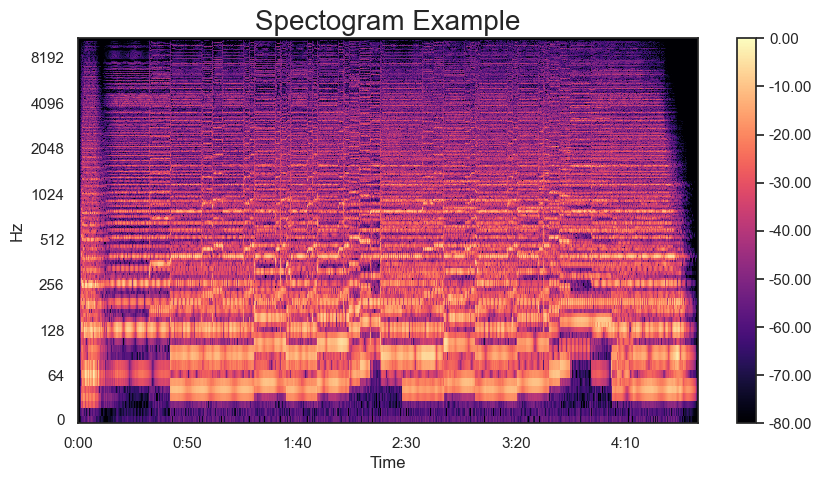

In [12]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

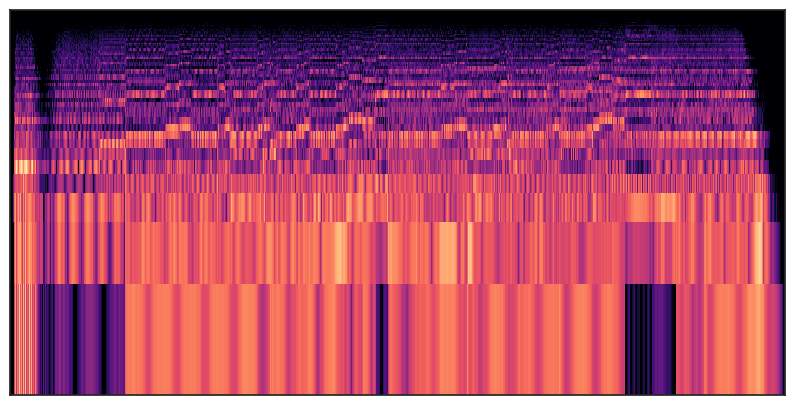

In [16]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=32 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
# ax.set_title('Mel Spectogram Example', fontsize=20)
# fig.colorbar(img, ax=ax, format=f'%0.2f')
ax.tick_params(axis="both", length=0, labelbottom=False, labelleft=False)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [55]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [60]:
audio_img = pd.DataFrame(S_db_mel)

In [61]:
audio_img

0     1     2     3     4     5     6     7     8     9     ...  9896  \
0  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
1  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
2  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
3  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
4  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
59 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
60 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
61 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
62 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   
63 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  ... -80.0   

    9897  9898  9899  9900  9901  9902  9903  9904  9905  
0  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
1  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
2  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
3  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
4  -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...  
59 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
60 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
61 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
62 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  
63 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0 -80.0  

[64 rows x 9906 columns]

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
scaled_audio_img = scaler.fit_transform(audio_img)

In [46]:
scaled_audio_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

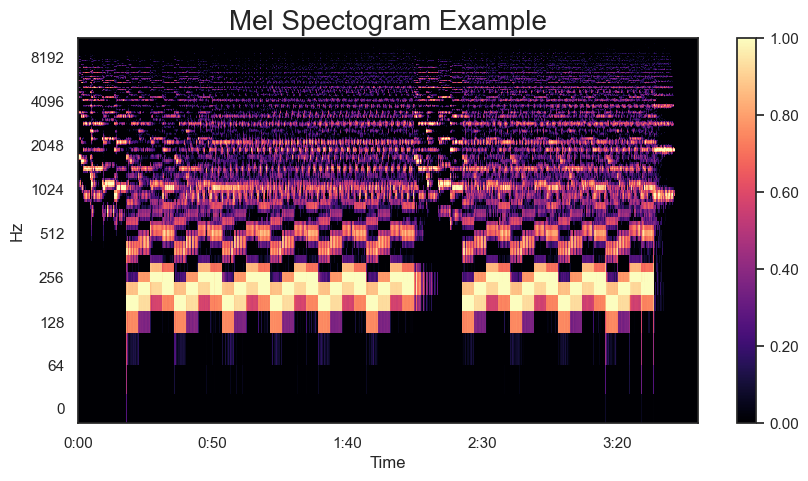

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(scaled_audio_img,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [48]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display


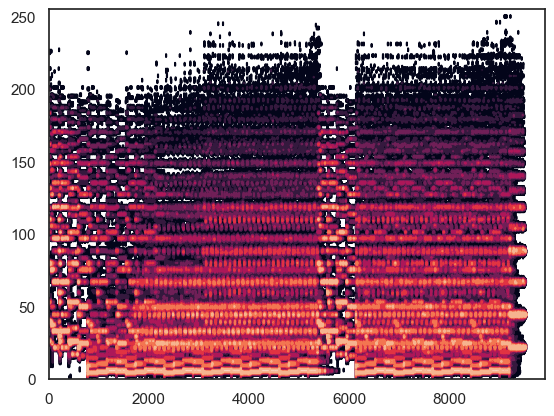

In [49]:
fig = plt.contour(scaled_audio_img)